# MNIST - Categorical_Classification

# Convolutional Neural Network(합성곱 신경말 알고리즘)


In [2]:
import warnings
warnings.filterwarnings('ignore')

import tensorflow
tensorflow.__version__

'2.5.0'

## Data Load

In [3]:
from tensorflow.keras.datasets import mnist

(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

## Data Preprocessing

In [5]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1) 

In [6]:
X_train = X_train.astype(float)/255
X_test = X_test.astype(float)/255

In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Keras Modeling

In [19]:
from tensorflow.keras import models
from tensorflow.keras import layers

#CNN
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size = (3,3), activation = 'relu',input_shape=(28,28,1)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size = (3,3), activation = 'relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size = (3,3), activation = 'relu'))

#DNN
model.add(layers.Flatten())
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

## Model Compile & Fit

In [20]:
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

%time
hist_mnist = model.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split=0.2)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 9.06 µs
Epoch 1/100
375/375 [==============================] - 42s 110ms/step - loss: 0.2916 - accuracy: 0.9110 - val_loss: 0.0868 - val_accuracy: 0.9728
Epoch 2/100
375/375 [==============================] - 41s 110ms/step - loss: 0.0681 - accuracy: 0.9793 - val_loss: 0.0610 - val_accuracy: 0.9816
Epoch 3/100
375/375 [==============================] - 41s 110ms/step - loss: 0.0458 - accuracy: 0.9847 - val_loss: 0.0733 - val_accuracy: 0.9796
Epoch 4/100
375/375 [==============================] - 41s 109ms/step - loss: 0.0368 - accuracy: 0.9882 - val_loss: 0.0401 - val_accuracy: 0.9878
Epoch 5/100
375/375 [==============================] - 41s 110ms/step - loss: 0.0291 - accuracy: 0.9906 - val_loss: 0.0510 - val_accuracy: 0.9848
Epoch 6/100
375/375 [==============================] - 41s 110ms/step - loss: 0.0232 - accuracy: 0.9927 - val_loss: 0.0455 - val_accuracy: 0.9868
Epoch 7/100
375/375 [==============================] - 4

##시각화

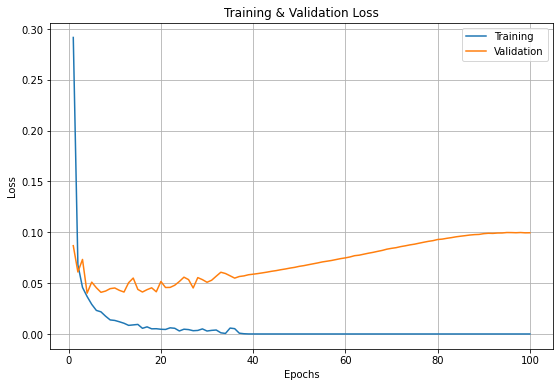

In [26]:
import matplotlib.pyplot as plt

epochs = range(1,len(hist_mnist.history['loss'])+1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, hist_mnist.history['loss'])
plt.plot(epochs, hist_mnist.history['val_loss'])

plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])
plt.grid()
plt.show()

In [27]:
loss, accuracy = model.evaluate(X_test,y_test)
print('Loss : ',loss)
print('accuracy :',accuracy)

313/313 [==============================] - 3s 10ms/step - loss: 0.0762 - accuracy: 0.9934
Loss :  0.07617184519767761
accuracy : 0.993399977684021
